In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ot
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture 
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# GMM

### Cleaning the data

In [3]:
# Preparing the data

df_3 = pd.read_csv('data\station_40.csv')
df_1 = pd.read_csv('data\station_49.csv')
df_4 = pd.read_csv('data\station_63.csv')
df_2 = pd.read_csv('data\station_80.csv')

col1 = [col + '_1' for col in df_1.columns]
col2 = [col + '_2' for col in df_2.columns]
col3 = [col + '_3' for col in df_3.columns]
col4 = [col + '_4' for col in df_4.columns]
col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

df_1.columns = col1
df_2.columns = col2
df_3.columns = col3
df_4.columns = col4

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_10_4,W_11_4,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.462204,3.951453,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.036085,0.879651,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.295700,2.556876,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.872424,3.686682,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,2.240781,2.920387,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40


In [9]:
### Reorganizing the columns

yields = ["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]

new_col = []
figures = list(range(1, 19))
for j in figures:
    for i in range(1, 5):
        new_col.append(f"W_{j}_{i}" )
        
new_col_t = ["YEAR"] + new_col + yields
full_df = full_df[new_col_t]
full_df.head()

,YEAR,W_1_1,W_1_2,W_1_3,W_1_4,W_2_1,W_2_2,W_2_3,W_2_4,W_3_1,...,W_17_3,W_17_4,W_18_1,W_18_2,W_18_3,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4
0,0,20.487164,18.325709,21.389266,16.086969,26.089329,24.840126,26.985066,24.245858,25.394672,...,3.046101,6.219460,0.886892,1.037317,2.680206,2.081787,6.37,10.51,10.32,5.97
1,1,21.430837,18.457140,21.314074,14.343275,22.228488,20.501430,22.516442,18.206660,24.205256,...,1.297795,1.540583,1.496904,1.818209,7.477726,3.214933,5.54,6.61,10.39,5.77
2,2,18.841767,16.874268,20.875083,14.787674,25.165941,22.280115,26.038845,21.581075,24.169267,...,3.863088,2.021236,0.682941,0.279352,2.659763,0.814444,4.39,6.86,8.49,8.65
3,3,18.359661,17.102786,20.553688,15.705925,20.235180,18.547797,20.992986,15.706772,22.714217,...,0.914197,1.106072,1.018326,1.468172,0.926442,0.870118,9.28,5.32,7.28,1.07
4,4,21.125963,19.693473,21.523342,16.394038,23.270596,20.145373,21.542900,15.535681,22.949896,...,1.746779,0.975300,1.938053,2.166599,1.708829,3.242242,8.86,6.32,7.31,7.40


<Axes: >

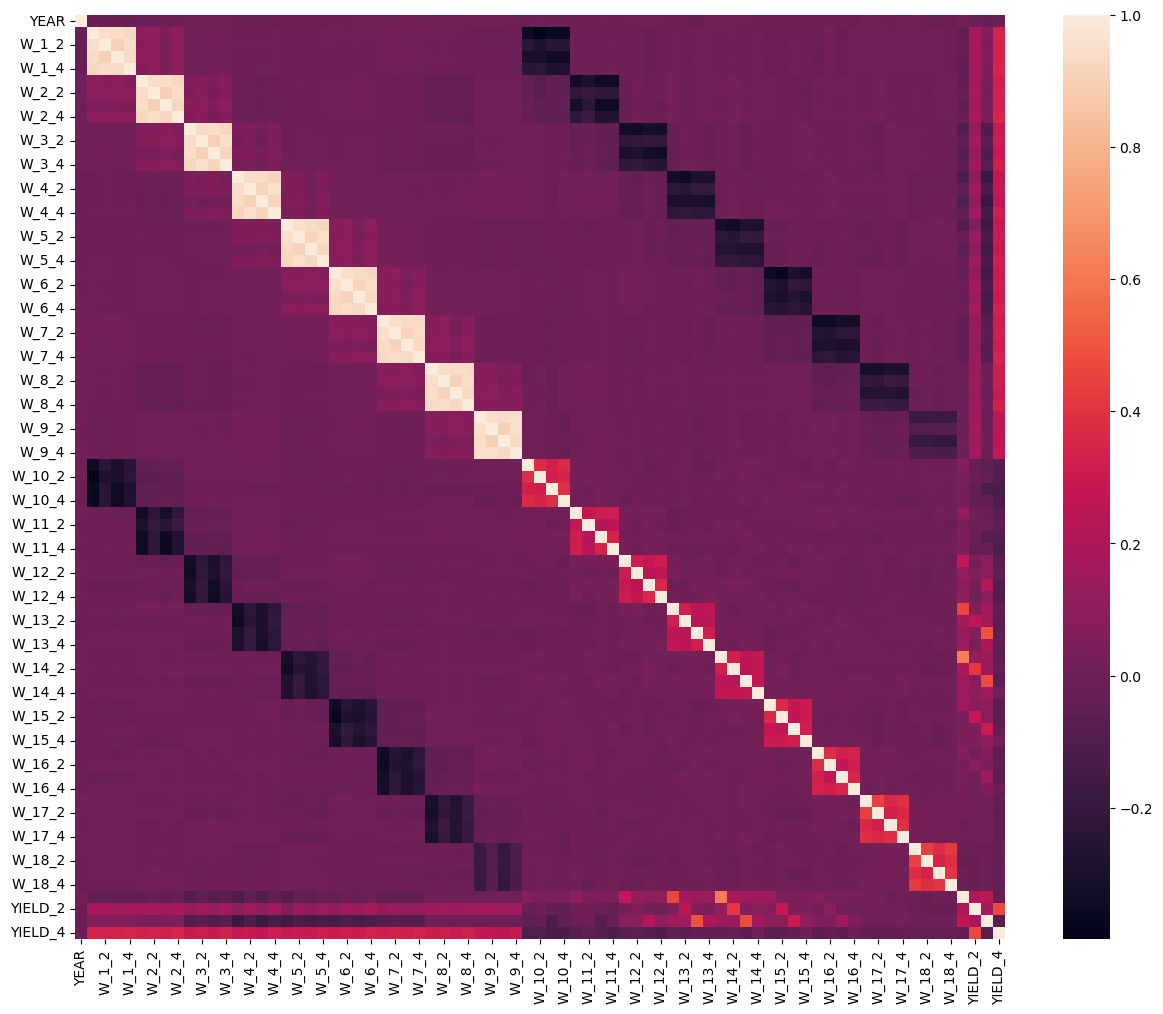

In [5]:
plt.figure(figsize=(15,12))
sns.heatmap(full_df.corr())

In [10]:
# Adding T and R

full_df["T"] = np.sum(full_df[['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1','W_8_1', 'W_9_1', 
                'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2',
                'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3','W_6_3', 'W_7_3', 'W_8_3', 'W_9_3',
                'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4'
                ]], axis=1) / 36

full_df["R"] = np.sum(full_df[['W_13_1', 'W_14_1','W_15_1', 'W_13_2', 'W_14_2', 'W_15_2', 
                'W_13_3', 'W_14_3', 'W_15_3', 'W_13_4', 'W_14_4', 'W_15_4'
                ]], axis=1) / 12

full_df.head()

,YEAR,W_1_1,W_1_2,W_1_3,W_1_4,W_2_1,W_2_2,W_2_3,W_2_4,W_3_1,...,W_18_1,W_18_2,W_18_3,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4,T,R
0,0,20.487164,18.325709,21.389266,16.086969,26.089329,24.840126,26.985066,24.245858,25.394672,...,0.886892,1.037317,2.680206,2.081787,6.37,10.51,10.32,5.97,22.404683,2.122557
1,1,21.430837,18.457140,21.314074,14.343275,22.228488,20.501430,22.516442,18.206660,24.205256,...,1.496904,1.818209,7.477726,3.214933,5.54,6.61,10.39,5.77,22.910263,1.443749
2,2,18.841767,16.874268,20.875083,14.787674,25.165941,22.280115,26.038845,21.581075,24.169267,...,0.682941,0.279352,2.659763,0.814444,4.39,6.86,8.49,8.65,23.096885,1.401006
3,3,18.359661,17.102786,20.553688,15.705925,20.235180,18.547797,20.992986,15.706772,22.714217,...,1.018326,1.468172,0.926442,0.870118,9.28,5.32,7.28,1.07,21.252078,1.563658
4,4,21.125963,19.693473,21.523342,16.394038,23.270596,20.145373,21.542900,15.535681,22.949896,...,1.938053,2.166599,1.708829,3.242242,8.86,6.32,7.31,7.40,23.344850,1.398759


In [11]:
# Creating masks

cold = full_df["T"] <= 21.2
mild = (full_df["T"] > 21.2) & (full_df["T"] <= 22)
hot = full_df["T"] > 22

low_rain = full_df["R"] <= 1.8
mild_rain = (full_df["R"] > 1.8) & (full_df["R"] <= 2.2)
strong_rain = full_df["R"] > 2.2

temps = [cold, mild, hot]
rains = [low_rain, mild_rain, strong_rain]

In [12]:
# Creating the local dataframes and storing them in a dico

dico = {i : {"df": None} for i in range(1, 10)}
i = 1
for rain in rains:
    for temp in temps:
        dico[i]["df"] = full_df[rain][temp]
        print(dico[i]["df"].shape)
        i += 1

(464, 79)
(1290, 79)
(1678, 79)
(534, 79)
(1254, 79)
(1082, 79)
(1007, 79)
(1690, 79)
(1001, 79)


In [13]:
# On a maintenant un bon dico pour travailler !!

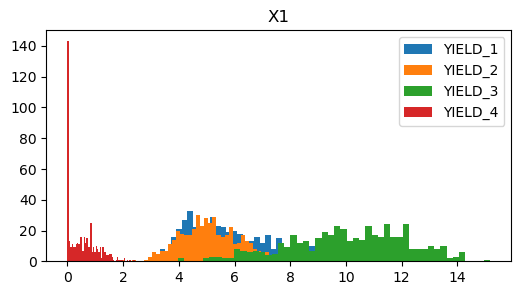

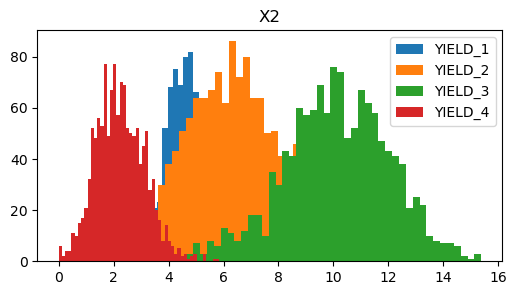

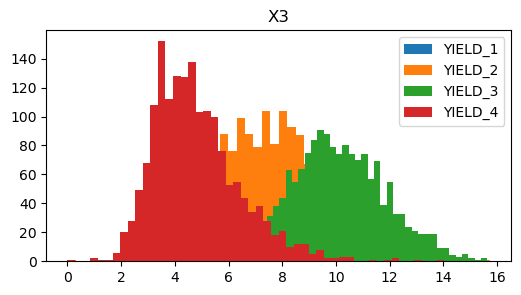

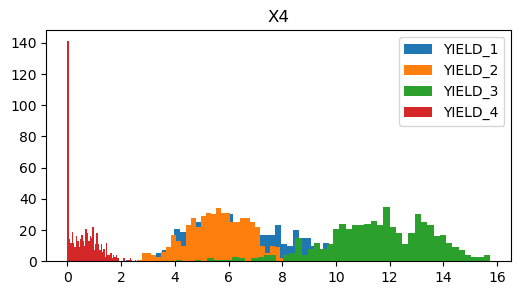

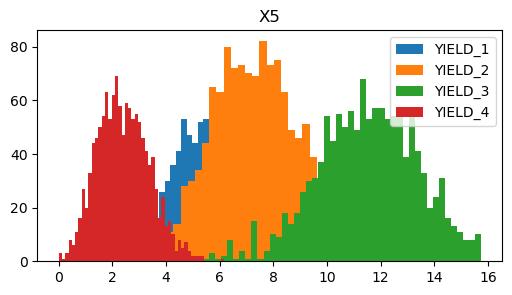

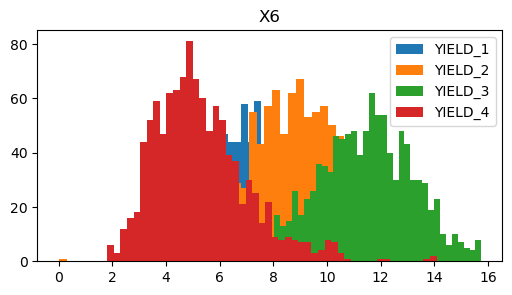

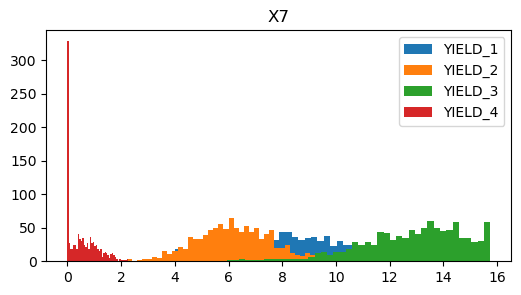

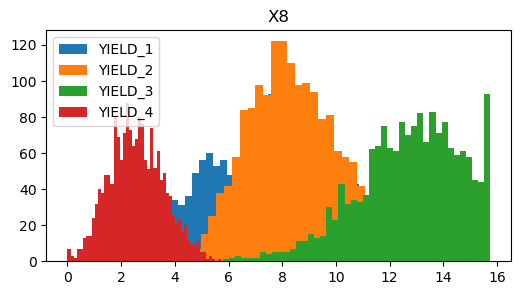

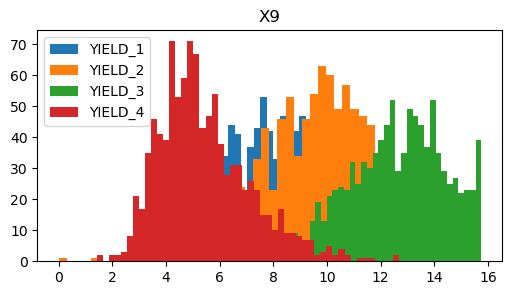

In [14]:
# let's have a look

for i in dico:
    plt.figure(figsize=(6,3))
    for y in yields:
        plt.hist(dico[i]["df"][y], bins=50, label=f"{y}")
    plt.title(f"X{i}")
    plt.legend()
    plt.show()

### Number of components

In [15]:
# Getting the optimal number of components from a BGM

from sklearn.mixture import BayesianGaussianMixture
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

for i in dico:
    bgm = BayesianGaussianMixture(n_components=15, n_init=10) #random_state=42
    bgm.fit(dico[i]["df"][yields])
    dico[i]["bgm"] = bgm
    dico[i]["bgm_weights"] = bgm.weights_.round(2)    

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\User\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [17]:
# Storing them

for i in dico:
    print(i, (dico[i]["bgm_weights"] > 0).sum())
    dico[i]["optimal_components"] = (dico[i]["bgm_weights"] > 0).sum()

1 7
2 11
3 12
4 6
5 9
6 10
7 10
8 12
9 10


### Simulating

In [18]:
# Training a GM for each subset
# Generating a sample for each of them

from sklearn.mixture import GaussianMixture

for i in range(1,10):
    gm = GaussianMixture(n_components=dico[i]["optimal_components"], n_init=20)
    gm.fit(dico[i]["df"][yields])
    dico[i]["gm"] = gm
    dico[i]["sample"] = gm.sample(len(dico[i]["df"]))[0]
    dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
    dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
    print(i, dico[i]["sample"].shape)

1 (464, 4)
2 (1290, 4)
3 (1678, 4)
4 (534, 4)
5 (1254, 4)
6 (1082, 4)
7 (1007, 4)
8 (1690, 4)
9 (1001, 4)


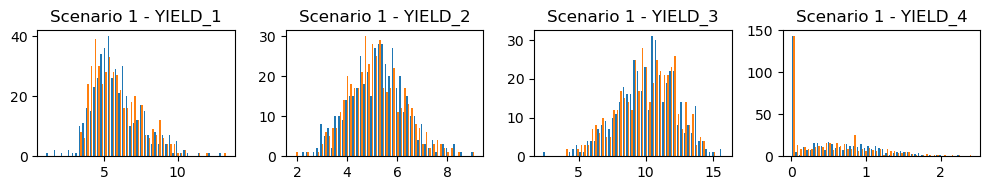

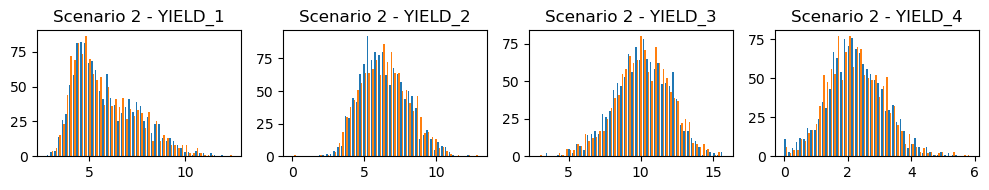

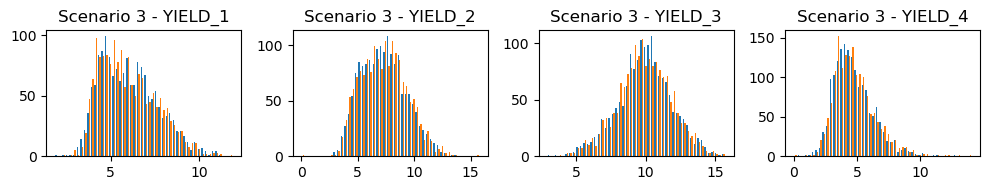

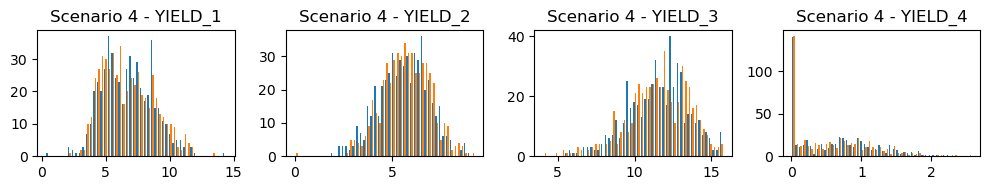

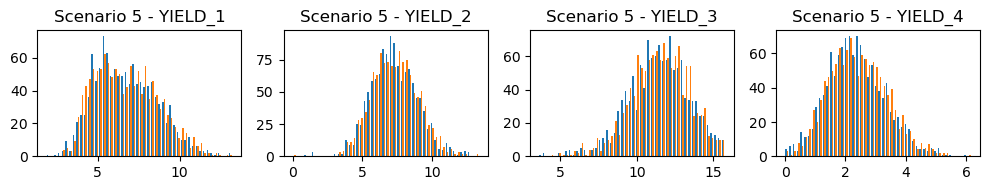

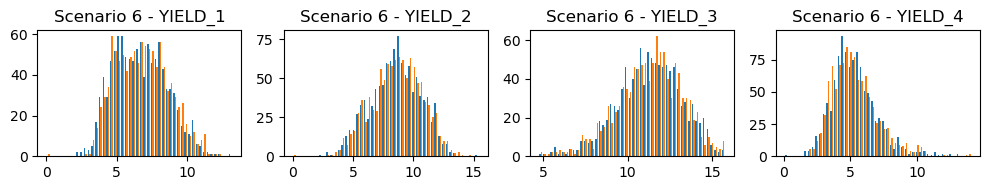

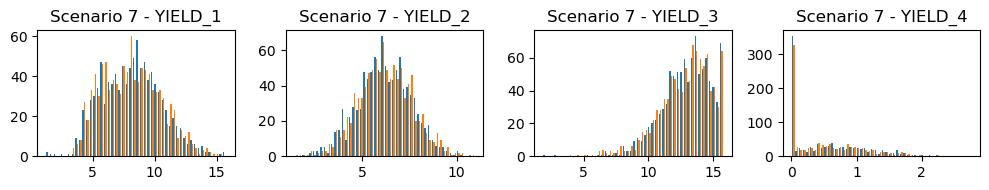

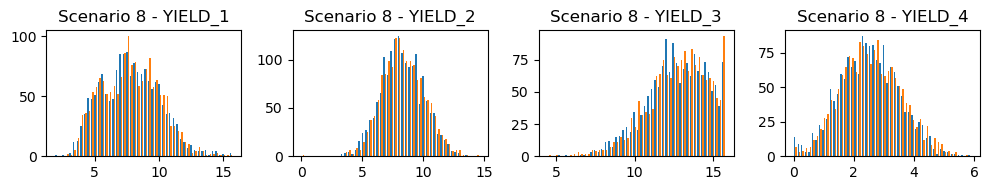

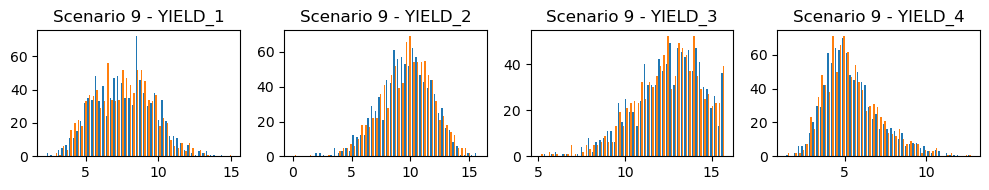

In [21]:
# Let's have a look
for dico_number in range(1,10):
    fig, axs = plt.subplots(1, 4, figsize=(10, 2))
    for i in range(4): 
        axs[i].hist([dico[dico_number]["sample"][:,i], dico[dico_number]["df"][yields[i]]], bins=50)
        axs[i].set_title(f"Scenario {dico_number} - {yields[i]}")
    plt.tight_layout()
    plt.show()

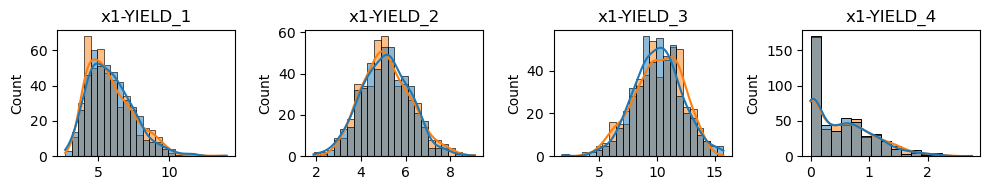

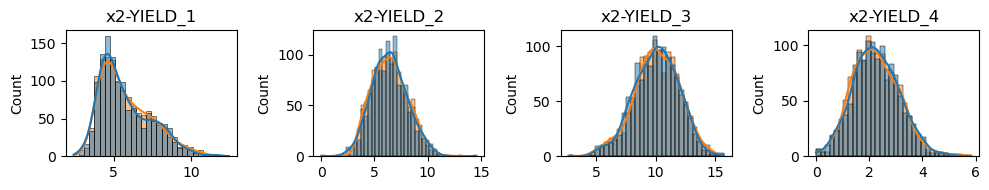

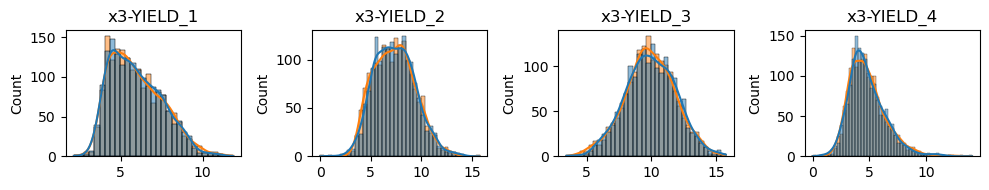

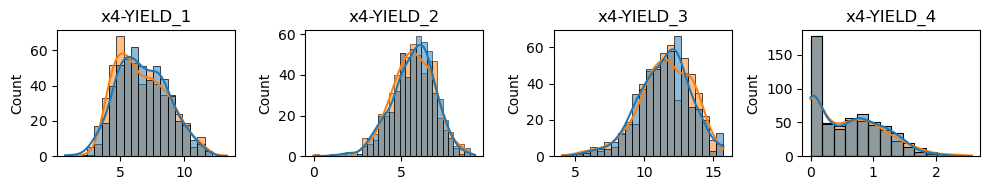

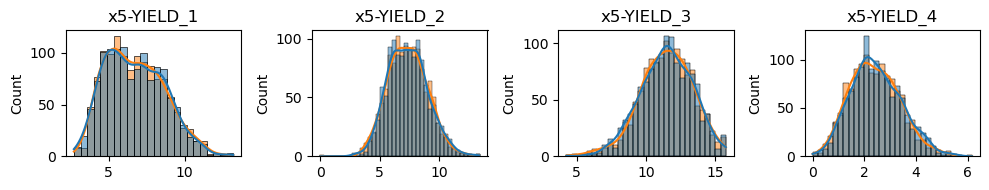

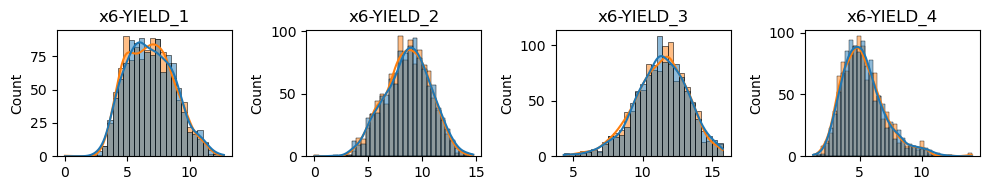

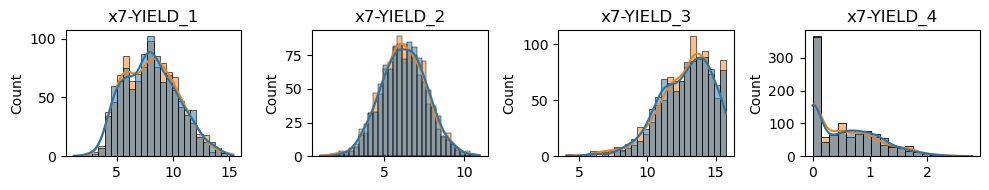

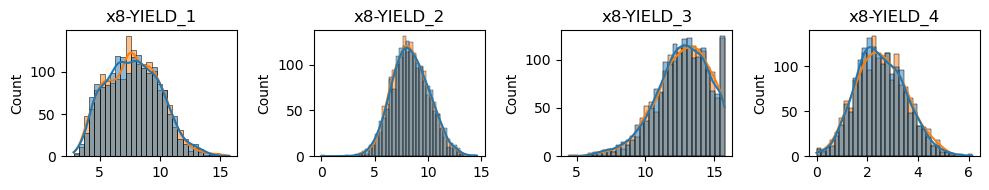

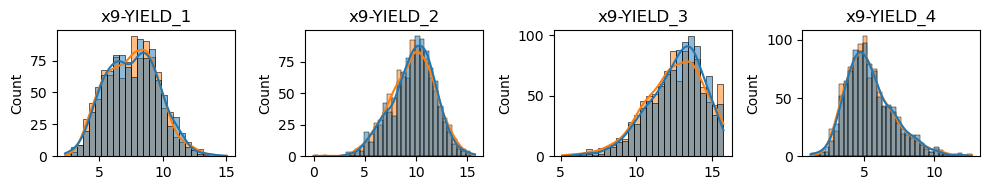

In [27]:
# Let's have a look
for dico_number in range(1,10):
    fig, axs = plt.subplots(1, 4, figsize=(10, 2))
    for i in range(4): 
        sns.histplot([dico[dico_number]["sample"][:,i], dico[dico_number]["df"][yields[i]]], bins='auto',
                     kde=True, ax=axs[i], legend=False)
        axs[i].set_title(f"x{dico_number}-{yields[i]}")
        SWD = ot.sliced.sliced_wasserstein_distance(np.array([dico[dico_number]["df"][yields[i]]]),
                                                    [dico[dico_number]["sample"][:,i]])
    plt.tight_layout()
    plt.show()

In [213]:
def weighted_SWD(SWDs):
    s = 0
    for i in range(1, 10):
        a = (1 - len(dico[i]['df']) / 10_000) * SWDs[i - 1]
        print(i, a)
        s += a
    return s
    

In [29]:
# Averaging SWD on samples and SWD angles #### CLEANER LA WEIGHTED AVERAGE

for i in range(1,10):
    dico[i]["SWD"] = []
    for j in range(1, 10):
        dico[i]["sample"] = dico[i]["gm"].sample(len(dico[i]["df"]))[0]
        dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
        dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
        true_yield = dico[i]["df"][yields].to_numpy()
        for k in range(10):
            dico[i]["SWD"].append(ot.sliced.sliced_wasserstein_distance(true_yield, dico[i]["sample"], n_projections=300))
    dico[i]["mean_SWD"] = np.mean(dico[i]["SWD"])
    print(i, dico[i]["mean_SWD"])

SWDs = [dico[i]["mean_SWD"] for i in range(1,10)]

print(f"Average SWD: {np.mean(SWDs)}")
print(f"Weighted average SWD: {weighted_SWD(SWDs)}")


1 0.16302076396754592
2 0.09459459569060402
3 0.10155758043476827
4 0.15943997854953293
5 0.09323785198494235
6 0.11754218017803494
7 0.1314026255034347
8 0.09153470133122008
9 0.1298088950448289
Average SWD: 0.12023768585387912
Weighted average SWD: 0.9707112796998962


### Storing them

In [183]:
from joblib import dump, load
import os

directory = 'gmm_models_matt'

for i in range(1, 10):
    filename = os.path.join(directory, f'model_{i}.joblib')
    model = dico[i]['gm']
    # dump(model, filename)

In [441]:
noise = np.load('data/noise.npy')
scenario = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0])

In [442]:
def generator(n, noise=noise, scenario=scenario): ### ATTENTION ENLEVER N
    latent_variable = noise[:, :4]
    
    # Loading the model
    scen = np.argmax(scenario) + 1
    filename = os.path.join(directory, f'model_{scen}.joblib')
    model = load(filename)

    # Getting the parameters
    weights = model.weights_
    means = model.means_
    covariances = model.covariances_

    # Simulating
    simul = np.zeros((4, n))
    for j in range(n):
        component_idx = np.random.choice(np.arange(len(weights)), p=weights)
        S = np.linalg.cholesky(covariances[component_idx])
        simul[:, j] = S @ latent_variable[j] + means[component_idx]

    simul = np.where(simul < 0, 0, simul)
    simul = np.where(simul > 15.75, 15.75, simul)

    return simul.T

In [447]:
for i in range(1, 10):
    n = len(dico[i]["df"])
    scenario = np.zeros(9)
    scenario[i - 1] = 1
    SWDs = []
    for j in range(30):
        SWDs.append(ot.sliced.sliced_wasserstein_distance(
            generator(n=n, scenario=scenario),
            dico[i]["df"][yields].to_numpy()
            ))
    print(i, np.mean(SWDs))

1 0.14201865854689624
2 0.0878735566449366
3 0.09624704816611306
4 0.13900382551568252
5 0.08988579905765483
6 0.11666303380941052
7 0.1112580195361777
8 0.08786191036316322
9 0.12474217450687543


# Tuning the GMM

In [227]:
for i in range(1, 10):
    dico[i]["best_gm"] = load(f'gmm_models_matt/tuned_best/model_{i}.joblib')
    SWDs = []
    n_sample = len(dico[i]["df"])
    for k in range(30):
        sample = dico[i]["best_gm"].sample(n_sample)[0]
        SWDs.append(ot.sliced.sliced_wasserstein_distance(dico[i]["df"][yields].to_numpy(), 
                                                          sample, 
                                                          n_projections=(2000 - n_sample) * 3))
    dico[i]["best_SWD"] = np.mean(SWDs)

for i in range(1, 10):
    SWDs = [dico[i]["best_SWD"] for i in range(1, 10)]
    
print(weighted_SWD(SWDs))

1 0.1352165851423197
2 0.09304294343044348
3 0.0898251562812044
4 0.146556185430176
5 0.09183752871453611
6 0.11920148333741346
7 0.12366597782371137
8 0.0890558955739599
9 0.1287740362057168
1 0.1289425355917161
2 0.08104040372791627
3 0.0747524950572183
4 0.13873008512820462
5 0.08032110261373329
6 0.10630388284030533
7 0.11121281385686364
8 0.07400544922196067
9 0.11588375518152456
0.9111925232194429


In [228]:
for i in range(1, 10):
    SWDs = [dico[i]["best_SWD"] for i in range(1, 10)]
    
print(weighted_SWD(SWDs))

1 0.1289425355917161
2 0.08104040372791627
3 0.0747524950572183
4 0.13873008512820462
5 0.08032110261373329
6 0.10630388284030533
7 0.11121281385686364
8 0.07400544922196067
9 0.11588375518152456
0.9111925232194429


In [226]:
directory = 'gmm_models_matt/tuned_best'

for j in range(2, 10):
    
    # Loading saved best model
    print(f"current scenario: {j}")
    best_gm = load(f'gmm_models_matt/tuned_best/model_{j}.joblib')
    n_sample = len(dico[j]["df"])

    # Initializing with saved model
    SWDs = []
    for k in range(30):
        sample = best_gm.sample(n_sample)[0]
        sample = np.where(sample > 15.75, 15.75, sample)
        sample = np.where(sample < 0, 0, sample)
        SWDs.append(ot.sliced.sliced_wasserstein_distance(dico[j]["df"][yields].to_numpy(), 
                                                        sample, 
                                                        n_projections=(2000 - n_sample) * 3))
    best_SWD = np.mean(SWDs)
    print(f"Best SWD so far: {best_SWD}") 
    
    # Trying different new Gaussian model
    n_components = best_gm.n_components
    for i in range(20):
        print(i)
        gm = GaussianMixture(n_components=n_components, n_init=10)
        gm.fit(dico[j]["df"][yields])
        SWDs = []
        for k in range(30):
            sample = gm.sample(n_sample)[0]
            sample = np.where(sample > 15.75, 15.75, sample)
            sample = np.where(sample < 0, 0, sample)
            SWDs.append(ot.sliced.sliced_wasserstein_distance(dico[j]["df"][yields].to_numpy(), 
                                                            sample, 
                                                            n_projections=(2000 - n_sample) * 3))
        mean_SWD = np.mean(SWDs)
        
        # Keeping as best if better that best
        if mean_SWD < best_SWD:
            print(f"new best SWD: {mean_SWD}")
            best_SWD = mean_SWD
            best_gm = gm
    filename = os.path.join(directory, f'model_{j}.joblib')
    dump(best_gm, filename)

current scenario: 2
Best SWD so far: 0.0924348239389757
0
1
new best SWD: 0.09220041919408464
2
new best SWD: 0.08944784996504786
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
current scenario: 3
Best SWD so far: 0.09391708625664989
0
new best SWD: 0.09109476046565038
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
current scenario: 4
Best SWD so far: 0.15176863424224046
0
new best SWD: 0.15145396595457034
1
new best SWD: 0.15035209101118452
2
3
4
5
6
7
8
9
new best SWD: 0.14870797270017036
10
11
new best SWD: 0.14505581336547144
12
13
14
15
16
new best SWD: 0.14278315236266667
17
18
19
current scenario: 5
Best SWD so far: 0.0934856767147605
0
new best SWD: 0.09312593492695519
1
2
3
4
new best SWD: 0.0894292686468526
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
current scenario: 6
Best SWD so far: 0.12080209456490164
0
1
new best SWD: 0.12072555832671829
2
3
4
5
6
7
new best SWD: 0.11708463815689676
8
9
10
11
12
13
14
15
16
17
18
19
current scenario: 7
Best SWD so far: 0.12264123425073993
0
n

In [221]:
directory = 'gmm_models_matt/tuned_best'
filename = os.path.join(directory, f'model_1.joblib')
# dump(best_gm, filename)

['gmm_models_matt/tuned_best\\model_1.joblib']

In [220]:
n_sample = len(dico[1]["df"])
SWDs = []
for k in range(30):
    sample = best_gm.sample(n_sample)[0]
    SWD = ot.sliced.sliced_wasserstein_distance(dico[1]["df"][yields].to_numpy(), 
                                                        sample, 
                                                        n_projections=5_000)
    print(SWD)
    SWDs.append(SWD)
print(np.mean(SWDs))

0.13880707751234825
0.13407360337183047
0.1407284743600959
0.13022300436833184
0.12373677898836846
0.15405352550302215
0.14751069455941612
0.11782097604973513
0.13446720701289455
0.12881009084762673
0.1557041267862699
0.13590576169288174
0.16194878708948948
0.140536764560358
0.13003023461764018
0.13225717465065961
0.148590694478483
0.1610205725179215
0.1344207222679334
0.13260227326572194
0.1330046352973279
0.12542751479769323
0.1533150847466785
0.15655489315161053
0.15163231017899248
0.13005180879224515
0.15823909113139406
0.1416726903727218
0.12462653682632113
0.13523732270856276
0.1397670144168192


In [214]:
best_SWDs = [dico[i]["best_SWD"] for i in range(1, 10)]
print(f"Average SWD: {np.mean(best_SWDs)}")
print(f"Weighted average SWD: {weighted_SWD(best_SWDs)}")

Average SWD: 0.1177934165906071
1 0.14395714254498973
2 0.07788083386058721
3 0.07857436706570245
4 0.14640180899994326
5 0.081556710914066
6 0.11005950428445933
7 0.11766820744824008
8 0.07636712411981028
9 0.11813893648135772
Weighted average SWD: 0.9506046357191561


In [189]:
for i in range(1, 10):
    dico[i]["best_gm"] = load(f'gmm_models_matt/tuned_best/model_{i}.joblib')
    n_components = dico[i]["best_gm"].n_components
    for k in range(10)
        gm = GaussianMixture(n_components=n_components, n_init=10)
        gm.fit(dico[1]["df"][yields])
        SWD
        
    

1 6 7
2 4 8
3 7 10
4 4 6
5 8 10
6 8 9
7 9 10
8 9 10
9 6 8


# Oversampling

### By hand with Gaussian noise

In [10]:
X1 = dico[1]["df"][yields]

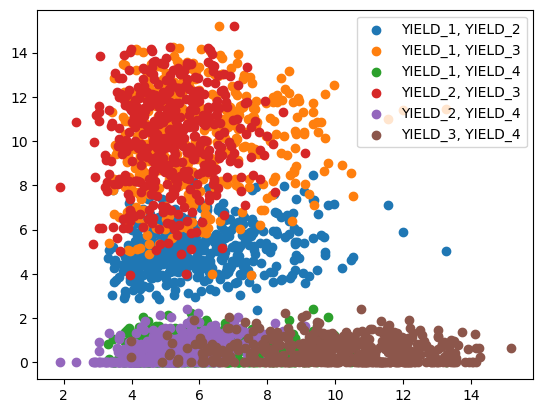

In [11]:
for i in range(4):
    for j in range(i + 1, 4):
        plt.scatter(X1[yields[i]], X1[yields[j]], label=f"{yields[i]}, {yields[j]}")
plt.legend()
plt.show()

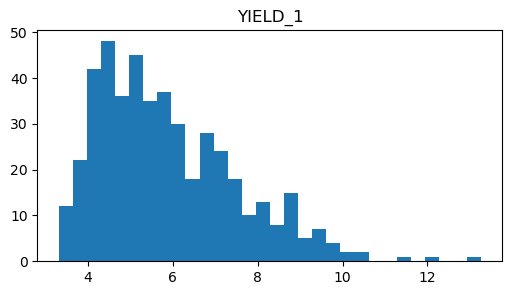

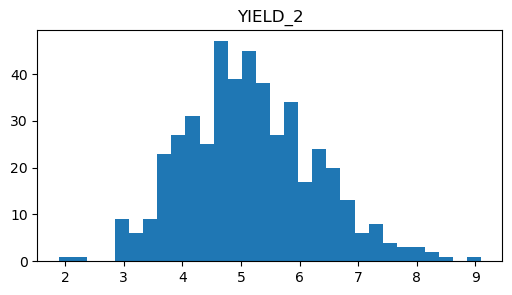

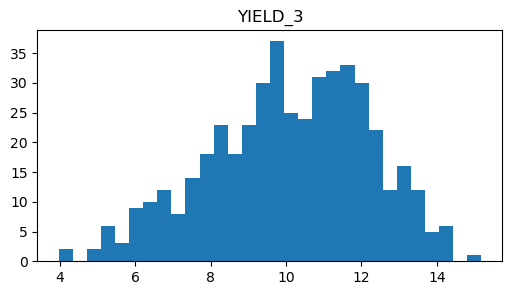

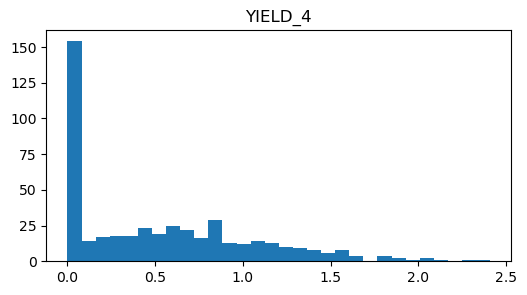

In [12]:
for i in range(4):
    plt.figure(figsize=(6, 3))
    plt.hist(X1[yields[i]], bins=30)
    plt.title(f"{yields[i]}")
    plt.show()

In [13]:
X1_n = X1.copy()
for i in range(4):
    scale = (max(X1[yields[i]]) - min(X1[yields[i]])) / 20
    noise = np.random.normal(loc=0, scale=scale, size=len(X1))
    X1_n.iloc[:, i] += noise
X1_n = (X1_n > 0) * X1_n
X1_n = (X1_n < 15.75) * X1_n + (X1_n > 15.75) * 15.75

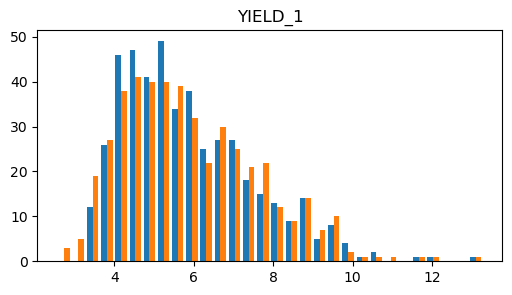

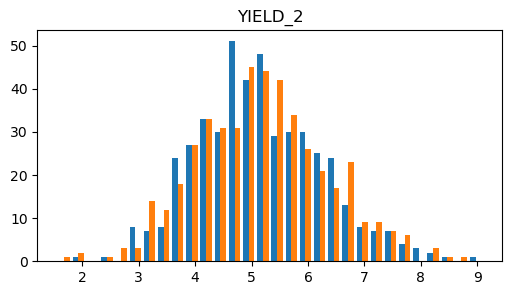

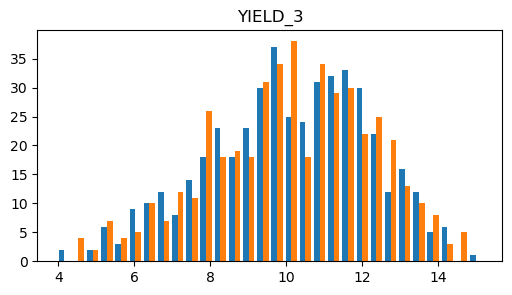

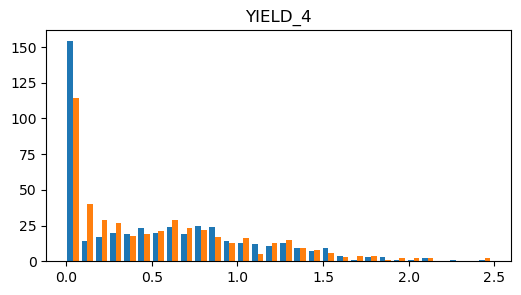

In [14]:
for i in range(4):
    plt.figure(figsize=(6, 3))
    plt.hist([X1[yields[i]], X1_n[yields[i]]], bins=30)
    plt.title(f"{yields[i]}")
    plt.show()

In [15]:
X_big = pd.concat([X1, X1_n])

In [16]:
X_big

,YIELD_1,YIELD_2,YIELD_3,YIELD_4
19,4.140000,3.970000,14.150000,0.000000
34,3.740000,4.130000,11.080000,0.000000
60,4.520000,5.910000,7.630000,0.580000
63,6.750000,4.970000,10.140000,0.580000
83,7.170000,4.640000,7.920000,0.000000
...,...,...,...,...
9901,4.789361,7.480127,8.195142,0.902523
9911,5.266955,4.393800,8.431571,0.741045
9982,6.192932,4.768204,9.691346,0.993454
9986,4.132615,5.945978,12.831186,0.223633


In [36]:
bgm = BayesianGaussianMixture(n_components=15, n_init=10, max_iter=200)
bgm.fit(X_big)

BayesianGaussianMixture(max_iter=200, n_components=15, n_init=10)

In [39]:
(bgm.weights_.round(2) > 0).sum()

11

In [66]:
gm = GaussianMixture(n_components=15, n_init=10)
gm.fit(X_big)

GaussianMixture(n_components=15, n_init=10)

In [72]:
SWDs = []
s = gm.sample(len(X1))[0]
s = np.where(s < 0, 0, s)
for j in range(30):
    SWDs.append(ot.sliced.sliced_wasserstein_distance(
        s,
        X1.to_numpy(),
        n_projections=200
        ))
print(np.mean(SWDs))

0.1551816019441085


### With ADASYN

In [108]:
from imblearn.over_sampling import ADASYN
n_neighbors = 9

# Creating a class columns and recreating the dataframe
for i in range(1, 10):
    dico[i]["df"]["class"] = i

df_class = dico[1]["df"]
for i in range(2,10):
    df_class = pd.concat((df_class, dico[i]["df"]))

df_class["class"].value_counts()

8    1690
3    1678
2    1290
5    1254
6    1082
7    1007
9    1001
4     534
1     464
Name: class, dtype: int64

In [100]:
X = df_class[yields]
Y = df_class["class"]

adasyn = ADASYN(sampling_strategy='minority', n_neighbors=n_neighbors)
X_resampled, Y_resampled = adasyn.fit_resample(X, Y)

Y_resampled.value_counts()

1    1693
8    1690
3    1678
2    1290
5    1254
6    1082
7    1007
9    1001
4     534
Name: class, dtype: int64

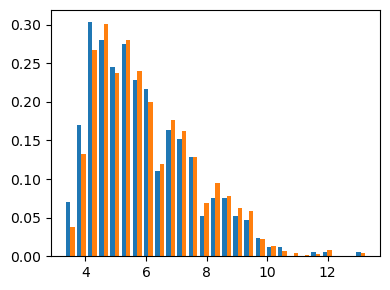

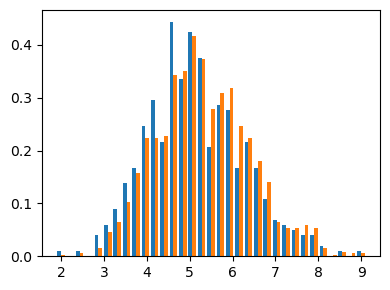

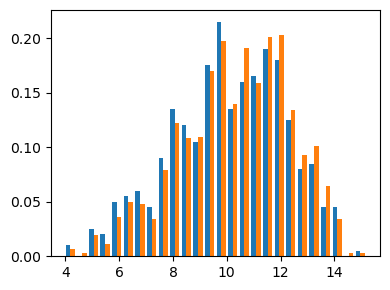

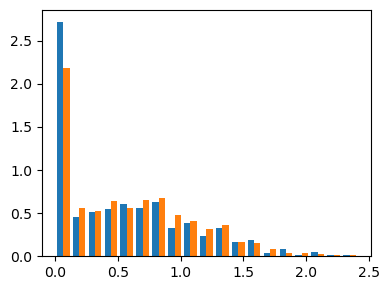

In [101]:
for i in range(1, 10):
    dico[i]["yields_resamp"] = X_resampled[Y_resampled == i]
    
for i in range(4):
    plt.figure(figsize=(4,3))
    plt.hist([dico[1]["df"][yields[i]], dico[1]["yields_resamp"].iloc[:, i]], bins='auto', density=True)
    plt.tight_layout()
    plt.show()


In [102]:
bgm = BayesianGaussianMixture(n_init=20, n_components=20)
bgm.fit(dico[1]["yields_resamp"])
sum((bgm.weights_).round(2) > 0)

20

In [103]:
bgm.weights_.round(2)

array([0.01, 0.11, 0.09, 0.07, 0.04, 0.02, 0.04, 0.02, 0.1 , 0.03, 0.05,
       0.04, 0.04, 0.05, 0.03, 0.03, 0.03, 0.01, 0.12, 0.05])

In [176]:
gm = GaussianMixture(n_components=11, n_init=20)
gm.fit(dico[1]["yields_resamp"])

SWDs = []
sample = gm.sample(len(dico[1]["df"]))[0]

In [180]:
ot.sliced.sliced_wasserstein_distance(dico[1]["df"][yields].to_numpy(),sample, n_projections=10_000)

0.22019698984075714